In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

path = '/Users/dangloan/Documents/learning_analytics/project/'

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

In [3]:
df = pd.read_csv(path + '3_data/clothing_review/Womens Clothing E-Commerce Reviews.csv')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.columns =['Clothing_ID',
 'Age',
 'Title',
 'Review_Text',
 'Rating',
 'Recommended_IND',
 'Positive_Feedback_Count',
 'Division_Name',
 'Department_Name',
 'Class_Name']

In [6]:
#Clean data
#First remove duplicates
df[df.duplicated(keep=False)].sort_values(by='Clothing_ID')
df.drop_duplicates(keep='first',inplace=True)
# df[df['Clothing_ID'] == 862]

## Topic modeling by Clothing_ID

##### I'm trying to see what people talk about in each product, i.e. if they like or dislike(rating average), then what they like/dislike about that product. I use topic modeling using LDA model. An expected result of the model would be that, for clothing id 1001, positive reviews talk most about quality, while negative reviews talk most about price, etc.

In [ ]:
### For products with low ratings (rating <=2)

In [112]:
df_neg = df[df['Rating'] <=2]

In [113]:
df_neg['Review_Text'] = df_neg['Review_Text'].astype(str)

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [83]:
# df2 = df_neg.groupby('Clothing_ID')['Review_Text'].apply(lambda x: x.sum()).reset_index()

In [141]:
df2 = df_neg[['Clothing_ID', 'Class_Name', 'Age', 'Review_Text']]
# df2 = df2[['Clothing_ID', 'Class_Name', 'Age', 'Review_Text']]

In [142]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [143]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
my_words = ['nan','way','back','x','bit','JJS','DT','CD','VBZ','MD',
            'disappointed','usually','still','bottom','however','item',
            'reason','much','great','definitely','lb','DT','work',
            'x','feel','pair','super','fall','piece','cd',
            'seem','md','coat','beautiful','thought','felt',
            'sad','ordered','someone','perfect',
            'make','wear','love','get','go','order','try','want',
            'run','think','see','review','buy','good',
            'take','come','give','keep','put','need','say','online',
            'bad','nice','cool','dt','rbr','person','purchase',
            'jacket','pants','shirt','dress','sweater','top','skirt','jean','blouse','denim']
stop_words = stop_words.union(my_words)

In [144]:
# Clean Review_Text

def clean(text):
    #Remove punctuations
    t = re.sub('[^a-zA-Z]',' ',text)
    #Convert to lowercase
    t = t.lower()
    #Remove tags
    t=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",t)
    #Remove special characters and digits
    t=re.sub("(\\d|\\W)+"," ",t)
    #Convert to list from string
    t = t.split()
    #Remove stopwords
    t = [word for word in t if not word in stop_words]
    
    
    t = " ".join(t)
    return t

df2['Review_Text_cleaned'] = df2['Review_Text'].apply(lambda x: clean(x))

# df2['Review_Text_cleaned1'] =df2['Review_Text_cleaned'].apply(
#     lambda l: [item for sublist in l for item in sublist])
df2['Review_Text_cleaned'].dropna(inplace=True)

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/pandas/core/series.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


In [145]:
df2.head(1)

,Clothing_ID,Class_Name,Age,Review_Text,Review_Text_cleaned
5,1080,Dresses,49,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of dress. the skirt is long and very full so it overwhelmed my small frame. not a stranger to alterations, shortening and narrowing the skirt would take away from the embellishment of the garment. i love the color and the idea of the style but it just did not work on me. i returned this dress.",tracy reese dresses one petite feet tall p brand pretty package lot long full overwhelmed small frame stranger alterations shortening narrowing would away embellishment garment color idea style returned


In [146]:
#Tokenize
from nltk.tokenize import sent_tokenize
df2['Review_Text_sentences'] = df2['Review_Text_cleaned'].apply(sent_tokenize)

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

def token_text(text):
    return [w_tokenizer.tokenize(w) for w in text]
df2['Review_Text_tokenized'] = df2['Review_Text_sentences'].apply(token_text)

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
[nltk_data] Downloading package punkt to /Users/dangloan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [147]:
#POS tagging
from nltk import pos_tag

# def pos_tag(text):
#     return [pos_tag(w) for w in text]
# df2['Review_Text_postag'] = df2['Review_Text_sentences'].apply(pos_tag) ## This function results in an 
#                                                                            ## error "Maximum recursion"

df2['Review_Text_postag'] = df2['Review_Text_tokenized'].apply(lambda sentence:
                        [pos_tag(token) for token in sentence])

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [148]:
# convert Penn treebank tag to wordnet tag
from nltk.corpus import wordnet
def penn_to_wn_tags(pos_tag):
    if pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('J'):
        return wordnet.ADJ
#     elif pos_tag.startswith('R'):
#         return wordnet.ADV
    else:
        return None

# lemmatize text based on POS tags
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

def lemmatize_text(text):
#     pos_tagged_text = pos_tag_text(text)
    lemmatized_tokens = [[wnl.lemmatize(el[0], penn_to_wn_tags(el[1]))
                         if penn_to_wn_tags(el[1]) else el[1]
                         for el in pos_tagged_text]
                         for pos_tagged_text in text]
    
    return lemmatized_tokens

In [149]:
df2['Review_Text_lemmatized'] = df2['Review_Text_postag'].apply(lemmatize_text)

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [150]:
df2.sample(1)

,Clothing_ID,Class_Name,Age,Review_Text,Review_Text_cleaned,Review_Text_sentences,Review_Text_tokenized,Review_Text_postag,Review_Text_lemmatized
19701,862,Knits,25,"I'm not sure if the top i received was damaged or if the design didn't consider gravity but this is not what i expected. i really want to like this top, but i don't see how i can wear it.",sure received damaged design consider gravity expected really like,[sure received damaged design consider gravity expected really like],"[[sure, received, damaged, design, consider, gravity, expected, really, like]]","[[(sure, RB), (received, VBN), (damaged, VBN), (design, NN), (consider, NN), (gravity, NN), (expected, VBN), (really, RB), (like, IN)]]","[[RB, receive, damage, design, consider, gravity, expect, RB, IN]]"


In [153]:
##Creating a list of stop words and adding custom stopwords
stop_words = set(stopwords.words("english"))
##Creating a list of custom stopwords
my_words = ['nan','way','back','x','bit','JJS','DT','CD','VBZ','MD', 'RB',
            'disappointed','usually','still','bottom','however','item',
            'reason','much','great','definitely','lb','DT','work',
            'x','feel','pair','super','fall','piece','cd',
            'seem','md','coat','beautiful','thought','felt',
            'sad','ordered','someone','perfect',
            'make','wear','love','get','go','order','try','want',
            'run','think','see','review','buy','good',
            'take','come','give','keep','put','need','say','online',
            'bad','nice','cool','dt','rbr','person','purchase',
            'jacket','pants','shirt','dress','sweater','top','skirt','jean','blouse','denim',
           'look']
stop_words = stop_words.union(my_words)

In [154]:
from itertools import chain 
df2['tokens'] = df2['Review_Text_lemmatized'].map(lambda sentences: list(chain.from_iterable(sentences)))
df2['tokens'] = df2['tokens'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in stop_words and len(token)>1])

In [155]:
##Get some information of the clothing item from df dataset
cat = df_neg[df_neg['Class_Name'] == 'Jeans']
df_cat = df2[df2['Clothing_ID'].isin(cat['Clothing_ID'])]

### Building LDA model

In [156]:
import itertools
from gensim import corpora, models

# list_of_list_of_tokens = [["a","b","c"], ["d","e","f"]]
# ["a","b","c"] are the tokens of document 1, ["d","e","f"] are the tokens of document 2...

# df_pos['tokens'] = df_pos['Review_Text_lemmatized'].apply(
#     lambda x : list(itertools.chain.from_iterable(x)))

list_of_list_of_tokens = df2['tokens'].tolist()
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

CPU times: user 6.87 s, sys: 38.6 ms, total: 6.91 s
Wall time: 7.04 s


In [157]:
for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=40):
    print(str(i)+": "+ topic)
    print()

0: 0.030*"color" + 0.020*"stretch" + 0.017*"fit" + 0.016*"show" + 0.015*"design" + 0.015*"pear" + 0.014*"kind" + 0.013*"problem" + 0.012*"model" + 0.012*"shape" + 0.012*"flat" + 0.012*"blue" + 0.012*"stay" + 0.012*"lay" + 0.011*"size" + 0.011*"store" + 0.011*"waistband" + 0.011*"hole" + 0.010*"large" + 0.010*"sewn" + 0.010*"big" + 0.010*"stitch" + 0.010*"skinny" + 0.010*"material" + 0.010*"tried" + 0.009*"bra" + 0.009*"overall" + 0.009*"coral" + 0.009*"wash" + 0.009*"woman" + 0.008*"hand" + 0.008*"line" + 0.008*"shoulder" + 0.008*"pull" + 0.008*"cami" + 0.008*"worn" + 0.008*"detail" + 0.008*"rise" + 0.008*"hang" + 0.007*"cozy"

1: 0.022*"fabric" + 0.020*"knee" + 0.018*"small" + 0.018*"color" + 0.018*"photo" + 0.017*"romper" + 0.016*"post" + 0.016*"last" + 0.016*"return" + 0.016*"sheer" + 0.015*"expect" + 0.015*"stiff" + 0.014*"version" + 0.013*"thin" + 0.013*"sleeve" + 0.013*"robe" + 0.013*"collar" + 0.013*"many" + 0.012*"sleeves" + 0.012*"retailer" + 0.012*"size" + 0.012*"fuzz" + 0.01

In [ ]:
lda_model[corpus[2]]

In [158]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/Users/dangloan/miniconda3/envs/py/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [222]:
pyLDAvis.save_html(vis, 'lda_pyLDAvis.html')

Find interesting topics in negative rating reviews (number of topics = 10):\
Topic 10: Price vs quality, delivery time, smell\
Topic 4: Size (top kw: size, small, medium, large, fit)\
Topic 8: Material (top kw: fabric, ichty, thick, hot, seam)\
Topic 2: Color\
Topic 5: Problem related to washing (top kw:wash, dry, hand, shrunk, cold, water, clean, instruction)\
Topic 1: Look in general\
Topic 7: Style/look\
Topic 3: Size and material (thin, sheer)???\
Topic 6: Design (boxy, arm, fit, retailer, hole,seam)???\
Topic 9: Bad tailored details, size???

In [ ]:
# # Save model to disk.
# temp_file = datapath("model")
# model.save('lda.lda_model')
# # Load a potentially pretrained model from disk.
# lda_model =  models.LdaModel.load('lda.lda_model')

In [159]:
topics = [lda_model[corpus[i]] for i in range(len(df2))]

In [160]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

In [161]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [162]:
dominant_topic = np.argmax(document_topic.values, axis=1)
document_topic['dominant_topic'] = dominant_topic

document_topic

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,dominant_topic
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.762850,0.000000,0.000000,0.000000,0.000000,0.157621,0.000000,0.071506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5
1,0.000000,0.000000,0.085791,0.000000,0.391608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.514581,0.000000,0.000000,17
2,0.000000,0.169016,0.000000,0.000000,0.441919,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.199253,0.000000,0.000000,0.183200,0.000000,0.000000,0.000000,0.000000,4
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.350463,0.000000,0.000000,0.000000,0.164273,0.000000,0.166343,0.000000,0.310586,0.000000,0.000000,0.000000,0.000000,7
4,0.491849,0.000000,0.000000,0.000000,0.000000,0.000000,0.153400,0.000000,0.000000,0.000000,0.251064,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.096139,0.000000,0.000000,0
5,0.000000,0.093920,0.085639,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.335575,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.477657,0.000000,0.000000,17
6,0.000000,0.000000,0.000000,0.718972,0.000000,0.264953,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
7,0.350166,0.000000,0.000000,0.000000,0.321208,0.289078,0.000000,0.000000,0.000000,0.000000,0.000000,0.033440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.151548,0.000000,0.452599,0.214894,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165270,7
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377171,0.615391,0.000000,0.000000,0.000000,16


In [133]:
len(document_topic)

2407

In [163]:
# x=list(range(0,20,1))
# lda_output = pd.concat([df2[['Clothing_ID', 'Class_Name', 'Age', 'Review_Text']],
#                        document_topic[['dominant_topic'] + x]],ignore_index=True, axis=1)

In [164]:
x=list(range(0,20,1))
x1 =df2[['Clothing_ID', 'Class_Name', 'Age', 'Review_Text']].reset_index()
x1.drop('index', axis=1, inplace=True)
x2=document_topic[['dominant_topic'] + x]
y = pd.concat([x1,x2], axis=1)

In [165]:
y.sample()

,Clothing_ID,Class_Name,Age,Review_Text,dominant_topic,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
1535,872,Knits,37,"I really wanted to love this top, but there is way too much fabric. it looks nothing like the pictures. it was more like a maternity top vs. a swingy top. i'll be returning this one.",16,0.0,0.0,0.395264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.579736,0.0,0.0,0.0


In [181]:
stat = pd.crosstab(y['Class_Name'], y['dominant_topic']).reset_index()
stat['sum'] = stat.sum(axis=1)
for i in range(0,20,1):
    stat[i] = stat[i]/stat['sum']*100

In [180]:
stat

dominant_topic,Class_Name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,sum
0,Blouses,14,4,52,7,47,23,8,10,15,15,8,9,17,13,10,28,31,9,17,11,348
1,Dresses,23,11,100,20,51,52,31,36,23,33,16,12,18,52,16,56,63,31,26,19,689
2,Fine gauge,4,2,12,4,10,6,4,5,5,2,4,3,4,10,5,4,5,3,6,7,105
3,Intimates,2,0,1,0,2,1,2,1,0,0,1,1,0,0,0,2,0,2,0,0,15
4,Jackets,5,2,8,1,6,3,4,7,0,3,4,0,3,6,6,3,2,4,3,3,73
5,Jeans,3,2,7,3,9,5,3,5,5,0,2,4,2,2,4,7,3,5,7,7,85
6,Knits,25,17,35,9,72,34,28,22,27,21,14,13,17,23,22,41,33,9,20,24,506
7,Layering,1,1,2,0,2,0,1,0,0,1,0,0,2,0,0,0,0,0,1,0,11
8,Legwear,0,1,1,0,1,1,0,3,2,0,0,0,0,0,1,2,0,4,0,0,16
9,Lounge,4,0,1,2,2,3,0,2,2,2,0,2,1,4,3,11,3,2,1,3,48


In [184]:
stat1 = stat.drop(columns ='sum')

In [187]:
stat1.columns.tolist()

['Class_Name',
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19]

In [213]:
stat1

dominant_topic,Class_Name,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,Blouses,4.022989,1.149425,14.942529,2.011494,13.505747,6.609195,2.298851,2.873563,4.310345,4.310345,2.298851,2.586207,4.885057,3.735632,2.873563,8.045977,8.908046,2.586207,4.885057,3.160920
1,Dresses,3.338171,1.596517,14.513788,2.902758,7.402032,7.547170,4.499274,5.224964,3.338171,4.789550,2.322206,1.741655,2.612482,7.547170,2.322206,8.127721,9.143687,4.499274,3.773585,2.757620
2,Fine gauge,3.809524,1.904762,11.428571,3.809524,9.523810,5.714286,3.809524,4.761905,4.761905,1.904762,3.809524,2.857143,3.809524,9.523810,4.761905,3.809524,4.761905,2.857143,5.714286,6.666667
3,Intimates,13.333333,0.000000,6.666667,0.000000,13.333333,6.666667,13.333333,6.666667,0.000000,0.000000,6.666667,6.666667,0.000000,0.000000,0.000000,13.333333,0.000000,13.333333,0.000000,0.000000
4,Jackets,6.849315,2.739726,10.958904,1.369863,8.219178,4.109589,5.479452,9.589041,0.000000,4.109589,5.479452,0.000000,4.109589,8.219178,8.219178,4.109589,2.739726,5.479452,4.109589,4.109589
5,Jeans,3.529412,2.352941,8.235294,3.529412,10.588235,5.882353,3.529412,5.882353,5.882353,0.000000,2.352941,4.705882,2.352941,2.352941,4.705882,8.235294,3.529412,5.882353,8.235294,8.235294
6,Knits,4.940711,3.359684,6.916996,1.778656,14.229249,6.719368,5.533597,4.347826,5.335968,4.150198,2.766798,2.569170,3.359684,4.545455,4.347826,8.102767,6.521739,1.778656,3.952569,4.743083
7,Layering,9.090909,9.090909,18.181818,0.000000,18.181818,0.000000,9.090909,0.000000,0.000000,9.090909,0.000000,0.000000,18.181818,0.000000,0.000000,0.000000,0.000000,0.000000,9.090909,0.000000
8,Legwear,0.000000,6.250000,6.250000,0.000000,6.250000,6.250000,0.000000,18.750000,12.500000,0.000000,0.000000,0.000000,0.000000,0.000000,6.250000,12.500000,0.000000,25.000000,0.000000,0.000000
9,Lounge,8.333333,0.000000,2.083333,4.166667,4.166667,6.250000,0.000000,4.166667,4.166667,4.166667,0.000000,4.166667,2.083333,8.333333,6.250000,22.916667,6.250000,4.166667,2.083333,6.250000


In [208]:
class_name = list(stat1.iloc[:,0])
class_name

['Blouses',
 'Dresses',
 'Fine gauge',
 'Intimates',
 'Jackets',
 'Jeans',
 'Knits',
 'Layering',
 'Legwear',
 'Lounge',
 'Outerwear',
 'Pants',
 'Shorts',
 'Skirts',
 'Sleep',
 'Sweaters',
 'Swim',
 'Trend']

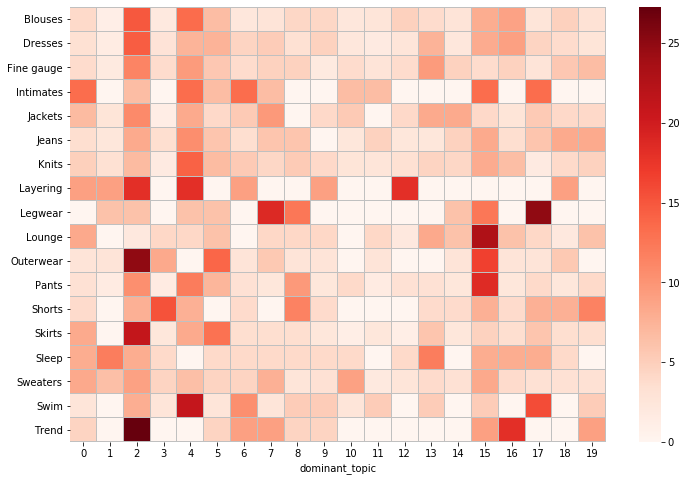

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
ax = sns.heatmap(stat1.iloc[:,1:],cmap='Reds',linewidths=0.005, linecolor='silver',
                 yticklabels = class_name)
plt.show()

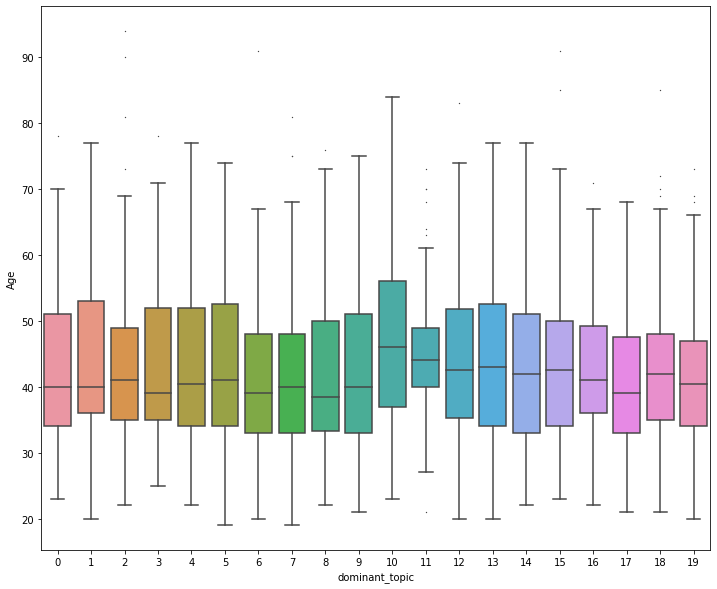

In [225]:
fig = plt.figure(figsize=(12,10))
sns.boxplot(x="dominant_topic", y="Age", data=y, fliersize='0.5')

In [ ]:
##### Find interesting topics in negative rating reviews (number of topics = 10):
##### Topic 10: Price vs quality, delivery time, smell
##### Topic 4: Size (top kw: size, small, medium, large, fit)
##### Topic 8: Material (top kw: fabric, ichty, thick, hot, seam)
##### Topic 2: Color
##### Topic 5: Problem related to washing (top kw:wash, dry, hand, shrunk, cold, water, clean, instruction)
##### Topic 1: Look in general
##### Topic 7: Style/look
##### Topic 3: Size and material (thin, sheer)???
##### Topic 6: Design (boxy, arm, fit, retailer, hole,seam)???
##### Topic 9: Bad tailored details, size???

### Map to data
##### Topic 9: Price vs quality, delivery time, smell
##### Topic 3: Size (top kw: size, small, medium, large, fit)
##### Topic 7: Material (top kw: fabric, ichty, thick, hot, seam)
##### Topic 1: Color
##### Topic 4: Problem related to washing (top kw:wash, dry, hand, shrunk, cold, water, clean, instruction)
##### Topic 0: Look in general
##### Topic 6: Style/look
##### Topic 2: Size and material (thin, sheer)???
##### Topic 5: Design (boxy, arm, fit, retailer, hole,seam)???
##### Topic 8: Size, bad tailored details, ???

In [ ]:
y[y[1] >=0.9].sample(1)

##### After going through some sample and verify model result reliability by eyes, it makes sense most of the case. 1 out of 5 case has inappropriate topic allocation.

##### The topic interpretation I generated seeems to work quite well

##### I find out that if the second dominant topic is around 0.3, it is worth select it is top topic as well. With that, we can say a review can mention more than 1 major issue of the product.

In [ ]:
## Let's find out how many documents is allocated to each topic

In [ ]:
document_topic1 = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

sns.set(rc={'figure.figsize':(10,5)})
document_topic1.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

In [ ]:
##### Find interesting topics in negative rating reviews (number of topics = 10):
##### Topic 10: Price vs quality, delivery time, smell
##### Topic 4: Size (top kw: size, small, medium, large, fit)
##### Topic 8: Material (top kw: fabric, ichty, thick, hot, seam)
##### Topic 2: Color
##### Topic 5: Problem related to washing (top kw:wash, dry, hand, shrunk, cold, water, clean, instruction)
##### Topic 1: Look in general
##### Topic 7: Style/look
##### Topic 3: Size and material (thin, sheer)???
##### Topic 6: Design (boxy, arm, fit, retailer, hole,seam)???
##### Topic 9: Bad tailored details, size???

#### Next, we can pick documents (reviews) that have very high probability (>=0.85) allocated to a topic. Do it for 10 topics